### Import resources and display image

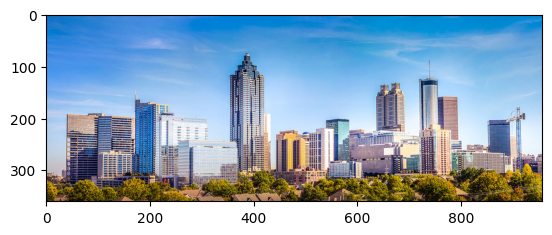

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('building2.jpg')

plt.imshow(image)

### Convert the image to grayscale

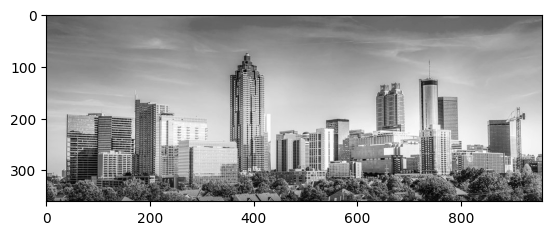

In [2]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### Convolution Through a Kernel

Image convolution is a mathematical operation where a small matrix (called a kernel or filter) slides over an image, performing element-wise multiplications and summing the results to produce a new pixel value. This process helps extract features such as edges, textures, and patterns by emphasizing specific spatial structures in the image. Convolution is widely used in image processing and deep learning, particularly in convolutional neural networks (CNNs) for feature detection.

Here we practice applying image convolution using traditional image processing operations.
1. **Select a Kernel (Filter):** Choose a small matrix (e.g., 3x3 or 5x5) with predefined values for a specific operation (e.g., edge detection, blurring).  

2. **Slide the Kernel Over the Image:** Move the kernel across the image, covering one region at a time.  

3. **Compute the Element-Wise Product:** Multiply each value in the kernel with the corresponding pixel values in the image region.  

4. **Sum the Products:** Add up all the multiplied values to obtain a single new pixel value.  

5. **Store the Result:** Place the computed value into the corresponding location in the output image.  

6. **Repeat for Entire Image:** Continue the process by shifting the kernel until every pixel has been processed.

Here is a common 3×3 kernel for edge detection, which detects edges in a specific direction, vertical and horizontal:

**Vertical Edge Detection Kernel:**
>$
K_x =
\begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{bmatrix}
$

**Horizontal Edge Detection Kernel:**
>$
K_y =
\begin{bmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1
\end{bmatrix}
$

These kernels are convolved with an image to highlight vertical and horizontal edges, respectively.

Applying a filter like this to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. 

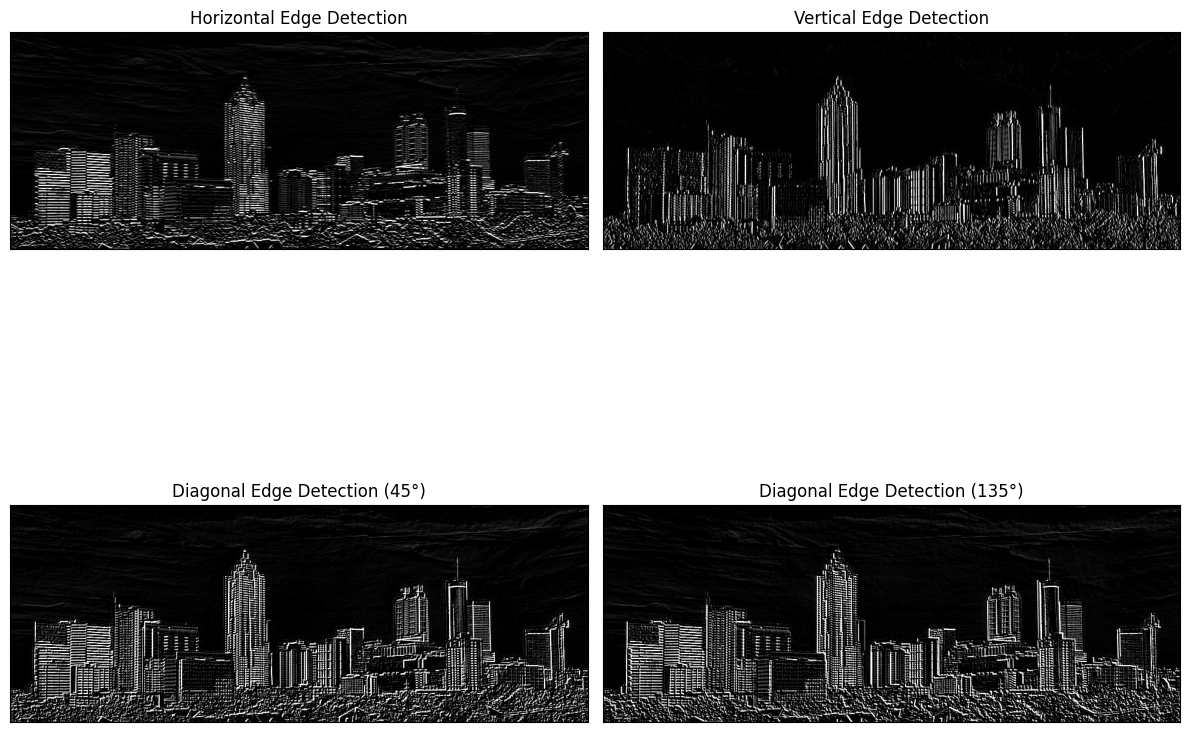

In [3]:
# Create edge detection kernels
horizon = np.array([[-1, -1, -1], 
                    [ 0,  0,  0], 
                    [ 1,  1,  1]])

# TODO: Create and apply a vertical edge detection operator
vertica = np.array([[-1,  0,  1], 
                    [-1,  0,  1], 
                    [-1,  0,  1]])

diag_45 = np.array([[-2, -1,  0], 
                    [-1,  0,  1], 
                    [ 0,  1,  2]])

diag135 = np.array([[ 0, -1, -2], 
                    [ 1,  0, -1], 
                    [ 2,  1,  0]])

# Load and convert the image to grayscale
gray = cv2.imread('building2.jpg', cv2.IMREAD_GRAYSCALE)  # Replace with actual image path

# Apply the kernels using cv2.filter2D
filtered_horizon = cv2.filter2D(gray, -1, horizon)
filtered_vertica = cv2.filter2D(gray, -1, vertica)
filtered_diag_45 = cv2.filter2D(gray, -1, diag_45)
filtered_diag135 = cv2.filter2D(gray, -1, diag135)

# Set up the figure with proper subplot grid (2x2)
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Display images with corresponding titles
axes[0, 0].imshow(filtered_horizon, cmap='gray')
axes[0, 0].set_title('Horizontal Edge Detection')

axes[0, 1].imshow(filtered_vertica, cmap='gray')
axes[0, 1].set_title('Vertical Edge Detection')

axes[1, 0].imshow(filtered_diag_45, cmap='gray')
axes[1, 0].set_title('Diagonal Edge Detection (45°)')

axes[1, 1].imshow(filtered_diag135, cmap='gray')
axes[1, 1].set_title('Diagonal Edge Detection (135°)')

# Remove axis ticks
for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


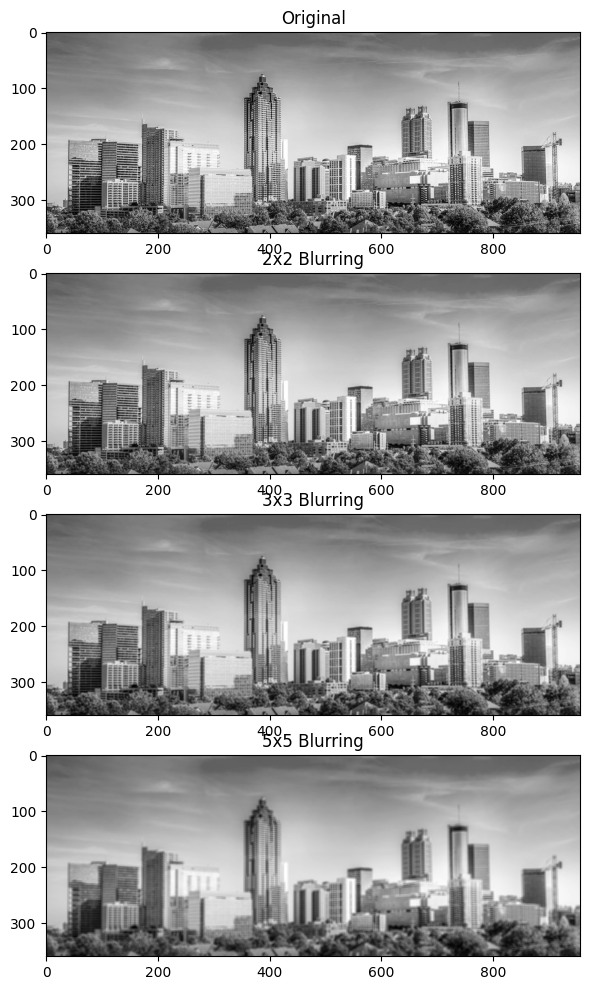

In [4]:
# Define blurring kernels
S2x2 = np.array([[1, 1], 
                 [1, 1]])
S3x3 = np.ones((3, 3))  # 3x3 averaging kernel
S5x5 = np.ones((5, 5))  # 5x5 averaging kernel

fig = plt.figure(figsize=(12, 12))
fig.add_subplot(4, 1, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original')

# 2x2 blurring
blurred_2x2 = cv2.filter2D(gray, -1, S2x2 / 4.0)
fig.add_subplot(4, 1, 2)
plt.imshow(blurred_2x2, cmap='gray')
plt.title('2x2 Blurring')

# 3x3 blurring
blurred_3x3 = cv2.filter2D(gray, -1, S3x3 / 9.0)
fig.add_subplot(4, 1, 3)
plt.imshow(blurred_3x3, cmap='gray')
plt.title('3x3 Blurring')

# 5x5 blurring
blurred_5x5 = cv2.filter2D(gray, -1, S5x5 / 25.0)
fig.add_subplot(4, 1, 4)
plt.imshow(blurred_5x5, cmap='gray')
plt.title('5x5 Blurring')

plt.show()

### TODO

Other image processing/filtering you can try:
- Other Edge Detector (e.g. Sobel Operator)
A common 3×3 kernel for edge detection is the **Sobel operator**, which detects edges in a specific direction. Below are the Sobel kernels for detecting vertical and horizontal edges:

**Vertical Edge Detection Kernel:**
> $
K_x =
\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
$

**Horizontal Edge Detection Kernel:**
> $
K_y =
\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
$

These kernels are convolved with an image to highlight vertical and horizontal edges, respectively.

- Corner Detection (use the kernels we discussed in slides)
- Scaling (after the blurring, can you pick one pixel out of the following?)
  - 2x2
  - 4x4
- Use other images of your choice
- For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

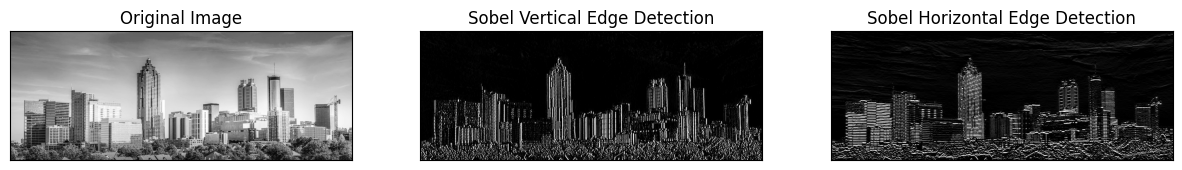

In [5]:
# Load and convert the image to grayscale
gray = cv2.imread("building2.jpg", cv2.IMREAD_GRAYSCALE)  # Replace with actual image path

# Sobel Edge Detection Kernels
sobel_x = np.array([[-1, 0, 1], 
                     [-2, 0, 2], 
                     [-1, 0, 1]])  # Vertical edge detection

sobel_y = np.array([[-1, -2, -1], 
                     [ 0,  0,  0], 
                     [ 1,  2,  1]])  # Horizontal edge detection

# Apply Sobel filters
sobel_x_filtered = cv2.filter2D(gray, -1, sobel_x)
sobel_y_filtered = cv2.filter2D(gray, -1, sobel_y)

# Display Results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(gray, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(sobel_x_filtered, cmap='gray')
axes[1].set_title('Sobel Vertical Edge Detection')

axes[2].imshow(sobel_y_filtered, cmap='gray')
axes[2].set_title('Sobel Horizontal Edge Detection')

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()


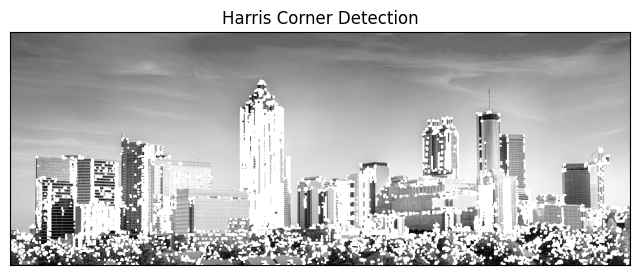

In [6]:
# Apply Harris Corner Detection
gray_float = np.float32(gray)  # Convert image to float32
harris_corners = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)

# Dilate corners for visibility
harris_corners = cv2.dilate(harris_corners, None)

# Thresholding to highlight corners
corner_img = gray.copy()
corner_img[harris_corners > 0.01 * harris_corners.max()] = 255  # Mark corners in white

# Display the result
plt.figure(figsize=(8, 8))
plt.imshow(corner_img, cmap='gray')
plt.title('Harris Corner Detection')
plt.xticks([]), plt.yticks([])
plt.show()


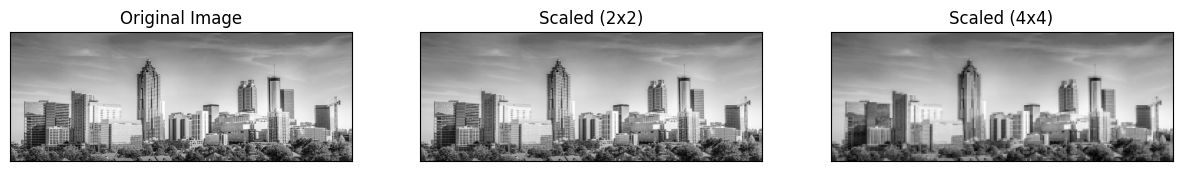

In [7]:
# Scaling the image using INTER_AREA for downsampling
scaled_2x2 = cv2.resize(gray, (gray.shape[1] // 2, gray.shape[0] // 2), interpolation=cv2.INTER_AREA)
scaled_4x4 = cv2.resize(gray, (gray.shape[1] // 4, gray.shape[0] // 4), interpolation=cv2.INTER_AREA)

# Display Results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(gray, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(scaled_2x2, cmap='gray')
axes[1].set_title('Scaled (2x2)')

axes[2].imshow(scaled_4x4, cmap='gray')
axes[2].set_title('Scaled (4x4)')

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()


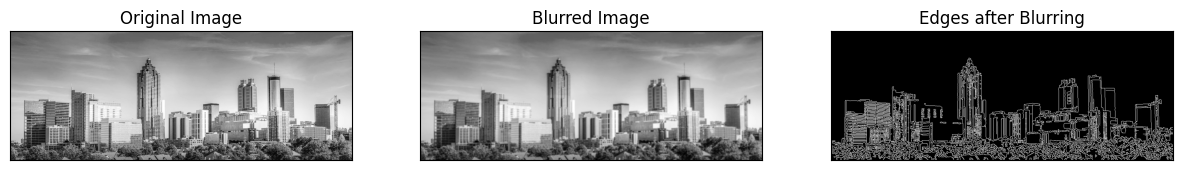

In [8]:
# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Edge Detection (Canny)
edges = cv2.Canny(blurred, 50, 150)

# Display Results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(gray, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(blurred, cmap='gray')
axes[1].set_title('Blurred Image')

axes[2].imshow(edges, cmap='gray')
axes[2].set_title('Edges after Blurring')

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()
